In [1]:
library(stringr)
library(RColorBrewer)
library(parallel)

In [2]:
setwd("/nfs/lab/projects/pbmc_snATAC/analysis_v2")

In [3]:
barcode_list = read.table('peaks/pbmc1-15_clusterLabels.txt',   sep="\t",header=T)

In [9]:
table(as.numeric(substring(barcode_list$sample,5)))


    1     2     3     4     5     6     8     9    10    12    13    14    15 
 9111  6894  6249  4597  4065  5119  8562  7221  6475  8113 12838  8392  8366 

In [4]:
tb = table(barcode_list$fine_populations, as.numeric(substring(barcode_list$sample,5)))

In [5]:
color_scheme = c('darkseagreen2' ,'cMono', '#A6D854','ncMono' , "green4", 'iMono', 'darkcyan', 'cDC', 
                 '#FF7F00','mem_b', '#FDC086', 'naive_b',
                 '#A65628','cyto_nk', '#F1E2CC', 'adaptive_NK', 
                 '#B3CDE3','naive_cd8_t', '#1F78B4', 'cyto_cd8_t', "deepskyblue2", "mem_cd8_t", 
                 '#E7298A','naive_cd4_t',  '#F781BF' ,'act_cd4_t' ,'red', 'tReg',
                 '#BC80BD','mkc' ,'#B3B3B3', 'pDC', "gold", "plasma")
color_scheme = matrix(color_scheme, ncol=2, byrow = T)

In [6]:
dim(color_scheme)

[1] 17  2

In [94]:
write.table(color_scheme , 'peaks/color_scheme.tsv', sep="\t", col.names = F, row.names = F)

In [11]:
clu = barcode_list
ag  = aggregate(list(clu$UMAP1, clu$UMAP2) , by = list(clu$fine_populations, clu$fine_populations) , mean   ) 

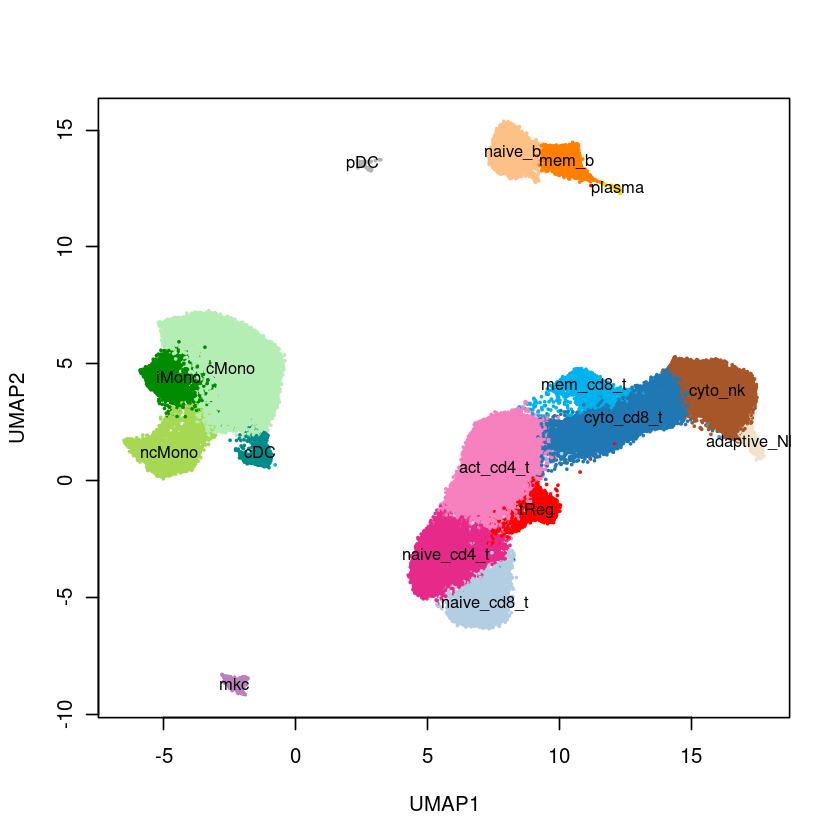

In [63]:
plot(UMAP2~UMAP1, barcode_list, pch = 16, 
     col = color_scheme[,1][match(barcode_list$fine_populations, color_scheme[,2])], cex=0.3, bty='o')
text (ag[,3], ag[,4], labels = ag[,1], cex=0.8)


In [87]:
png("figures/UMAP_clusters_small.png", width = 2, height = 2, units = 'in', res = 300)
par (mar=c(0,0,0,0))
plot(UMAP2~UMAP1, barcode_list, pch = 16, 
     col = color_scheme[,1][match(barcode_list$fine_populations, color_scheme[,2])], cex=0.1, bty='n', axes=F)
dev.off()

png 
  2

In [59]:
tab = tb[color_scheme[,2],]

In [89]:
colnames(tab)= paste0("PBMC", colnames(tab))

In [60]:
pdf("figures/Legend.pdf")
par( mar = c(1,1,1,1))
plot.new()
legend("topleft", bty="n", pt.bg = color_scheme[,1], pch=21,y.intersp = 1,
      legend = paste0(rownames(tab), " (",  format( rowSums(tab),big.mark=",") , ")") ,pt.cex =1.5)
dev.off()

png 
  2

In [92]:
#options(repr.plot.width=8, repr.plot.height=4)
#set.seed(9)
col_samples = colorRampPalette(brewer.pal(11,"RdYlBu"))(13)
pc = tab/rowSums(tab)
pc2 = t(t(tab)/colSums(tab))
palette = color_scheme[,1]
pdf("figures/barplot_clusters.pdf")

par(mfcol=c(2,3), mar = c(6,2,2,0))
barplot(t(tab), col = col_samples,  las=2, ylim= c(0,25000))
barplot(as.matrix(tab), col = palette, las=2, ylim=c(0,14000))

barplot(t(pc), col = col_samples, las=2)
barplot(pc2,  col = palette, las=2)
plot.new()
legend("topleft", bty="n", pt.bg = col_samples, pch=22,
      legend = colnames(tab),pt.cex =2)
par( mar = c(1,1,1,1))
plot.new()
legend("topleft", bty="n", pt.bg = palette, pch=22,y.intersp = 0.9,
      legend = rownames(tab),pt.cex =2)
dev.off()

png 
  2

In [86]:
di = 'figures/'
for (n in 1:13){
  sa =   unique(barcode_list$sample)[n]
sub = subset(barcode_list, sample ==sa)

png(paste0(di,toupper(sa), ".png") , width = 2, height = 1.7, units = 'in', res = 300)
par (mar=c(0,0,0,0))
plot(UMAP2~UMAP1, sub, pch = 16, cex=0.2, bty='o', col="gray", axes=F, xlim= c(-6.55, 18))
    mtext(paste(paste0(" ", toupper(sa)),colSums(tab)[n], sep="\n "), line=-2.3, adj=0)
    rect(-7.3,-10,18.5,16)
dev.off()
    }

In [84]:
min(barcode_list$UMAP1)

[1] -6.503134

In [85]:
max(barcode_list$UMAP1)

[1] 17.75329

 ### Compare with FLOW cytometry

In [7]:
prp = read.table('peaks/pbmc1-15_flowcytometry_v_clustering.txt', header=T)


In [9]:
table(prp$CellType)


  B Leu  Mo  NK   T 
 13  13  13  13  13 

In [10]:
prp = subset(prp, CellType!="Leu")

color = c('#FF7F00', '#756BB1',  '#7FC97F', '#A65628')


In [13]:
pdf("figures/cell_props.pdf")
par(pin=c(4,3))
plot(Flow~Clustering, prp, pch=16, col = rep(color, each=10), cex=1.5 ,
    xlab = "Cell type proportion by clustering", ylab = "Cell type proportion by flow cytometry")
legend ("topleft", col = color, pch=16, cex=1.5, legend = c('B', 'T', 'Mono', 'NK') )
dev.off()

png 
  2